# Inferential statistics on a Banking Dataset

### Importing the required libraries

In [1]:
import pandas as pd
import scipy.stats as stats
import math
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import ztest
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

### Setting up parameters

In [2]:
sample_size=2000    #Sample_Size
z_critical = stats.norm.ppf(q = 0.95)   #Z_Critical Score

# Critical Value
critical_value = stats.chi2.ppf(q = 0.95, df = 6)
#Find the critical value for 95% confidence*
#Df=number of variable categories(in purpose) - 1

#Reading file
data=pd.read_csv('file (3).csv')

In [3]:
data.head(10)

,customer.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
0,LA001,Yes,debt_consolidation,11.89%,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,Less than 5,No,Yes
1,LA002,Yes,credit_card,10.71%,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,Less than 5,No,Yes
2,LA003,Yes,debt_consolidation,13.57%,366.86,10.373491,11.63,682,4710.000000,3511,25.6,0,Less than 5,No,Yes
3,LA004,Yes,debt_consolidation,10.08%,162.34,11.350407,8.10,712,2699.958333,33667,73.2,0,Less than 5,No,Yes
4,LA005,Yes,credit_card,14.26%,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,Less than 5,Yes,Yes
5,LA006,Yes,credit_card,7.88%,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,Less than 5,No,Yes
6,LA007,Yes,debt_consolidation,14.96%,194.02,10.714418,4.00,667,3180.041667,3839,76.8,1,Less than 5,No,No
7,LA008,Yes,all_other,11.14%,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,Less than 5,No,No
8,LA009,Yes,home_improvement,11.34%,87.19,11.407565,17.25,682,3989.000000,69909,51.1,0,Less than 5,No,Yes
9,LA0010,Yes,debt_consolidation,12.21%,84.12,10.203592,10.00,707,2730.041667,5630,23.0,0,Less than 5,No,Yes


In [4]:
data.shape

(9578, 15)

### FINDING THE CONFIDENCE INTERVAL

In [5]:
data_sample = data.sample(n=sample_size, random_state=0)
sample_mean = data_sample['installment'].mean()
sample_std = data_sample['installment'].std()

margin_of_error = round(z_critical*(sample_std/float(math.sqrt(sample_size))), 2)

confidence_interval = (sample_mean - margin_of_error,sample_mean + margin_of_error)
print(confidence_interval)

(309.970965, 325.25096499999995)


In [6]:
#Mean of the installment column
true_mean = data.installment.mean()
print(true_mean)

319.08941323867265


In [7]:
#Check if the mean lies within the confidence interval or not
if confidence_interval[0] <= true_mean <= confidence_interval[1]:
    print('In range')
else:
    print('not in range')

In range


### Find if the Central Limit Theorem holds true for the installment column

In [8]:
#Different sample sizes
sample_size=np.array([20,50,100])    #different sample sizes chosen for the test

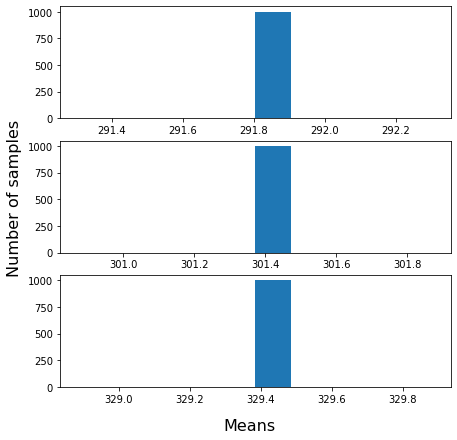

In [9]:
#PLotting histogram for means
fig, axes = plt.subplots(nrows=3, ncols=1,figsize = (7,7), sharey=True)   #Subplots
for i in range(len(sample_size)):   #iterate over the sample size length(i.e. 3)
    m=[]   #empty list to store the means of samples
    for j in range(1000):   #iterate 1000 times to take 1000 samples of each sample size chosen
        m.append(data.sample(n=sample_size[i], random_state = 0)['installment'].mean()) #store
    mean_series = pd.Series(m)   #Convert list to series for plotting ease
    axes[i].hist(mean_series)  #plot histogram
fig.text(0.5, 0.04, 'Means', ha='center', fontsize = 16)
fig.text(0.02, 0.5, 'Number of samples', va='center', rotation='vertical', fontsize = 16)
plt.show()

### Hypothesis testing - Small Business Interests

- The bank manager believes that people with purpose as 'small_business' have been given int.rate more due to the risk assosciated

##### Let's do a hypothesis testing(one-sided)
- Null Hypothesis H_0:
There is no difference in interest rate being given to people with purpose as 'small_business'

- Alternate Hypothesis H_1:
Interest rate being given to people with purpose as 'small_business' is higher than the average interest rate

In [10]:
#Removing the % sign from the int.rate column
data['int.rate'] = data['int.rate'].map(lambda x: str(x)[:-1])

In [11]:
#Dividing the column values by 100
data['int.rate']=data['int.rate'].astype(float)/100

In [12]:
#Applying ztest for the hypothesis
z_statistic_1, p_value_1 = ztest(x1=data[data['purpose']=='small_business']['int.rate'], value=data['int.rate'].mean(), alternative='larger')

print(('Z-statistic 1 is :{}'.format(z_statistic_1)))
print(('P-value 1 is :{}'.format(p_value_1)))

Z-statistic 1 is :12.321276240201554
P-value 1 is :3.479213190639132e-35


### Hypothesis Testing - Installment VS Loan Defaulting

- The bank thinks that monthly installments that customers have to pay might have some sort of effect on loan defaulters

##### Let's do hypothesis testing(two-sided)
- Null Hypothesis H_0:
There is no difference in installments being paid by loan defaulters and loan non defaulters

- Alternate Hypothesis
There is difference in installments being paid by loan defaulters and loan non defaulters

In [13]:
#Applying ztest for the hypothesis
z_statistic_2, p_value_2 = ztest(x1=data[data['paid.back.loan']=='No']['installment'], x2=data[data['paid.back.loan']=='Yes']['installment'])

print(('Z-statistic 2 is :{}'.format(z_statistic_2)))
print(('P-value 2 is :{}'.format(p_value_2)))

Z-statistic 2 is :4.894575287952092
P-value 2 is :9.85182562491764e-07


### Hypothesis Testing - Purpose VS Loan Defaulting

- bank suspects that there is a strong association between purpose of the loan(purpose column) of a person and whether that person has paid back loan (paid.back.loan column)

- Since both are categorical columns, we will do chi-square test to test the same.

##### Since both are categorical columns, we will do chi-square test to test the same.
- Null Hypothesis :
Distribution of purpose across all customers is same.

- Alternative Hypothesis :
Distribution of purpose for loan defaulters and non defaulters is different.

In [14]:
# Subsetting the dataframe
yes=data[data['paid.back.loan']=='Yes']['purpose'].value_counts()
no=data[data['paid.back.loan']=='No']['purpose'].value_counts()

In [15]:
#Concating yes and no into a single dataframe
observed=pd.concat([yes.transpose(),no.transpose()], 1,keys=['Yes','No'])
observed

,Yes,No
all_other,1944,387
credit_card,1116,146
debt_consolidation,3354,603
educational,274,69
home_improvement,522,107
major_purchase,388,49
small_business,447,172


In [16]:
chi2, p, dof, ex = chi2_contingency(observed)


print("Critical value")
print(critical_value)


print("Chi Statistic")
print(chi2)

Critical value
12.591587243743977
Chi Statistic
96.98469589063261
